## Observations and Insights 

1. The correlation between mouse weight amd average tumor volume was a positive correlation of 0.84. It is fair to assume that as mouse weight increases so does the size of the tumor.
2. Bar graph data showed that Capomulin has the maximum number of mice and Zoniferol has the smallest amount. When duplicates were removed from the data we found the mouse count to be fairly even betweeeen male and female: 125 male and 124 female (showed in pie charts)
3. Through the regression analysis our R squared value averages right around 0.70 which means 70% of our data fits the model. Higher R squared values notify smaller differences in data between our DV and IV.
4. Based on the data given Capomulin and Ramicane are the most effective treatments to reduce the size of tumors.

In [193]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import scipy.stats as linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"


In [157]:
# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)
#mouse_metadata
#study_results

In [158]:
# Combine the data into a single dataset
mouse_data_results = pd.merge(mouse_metadata, study_results, on='Mouse ID')
mouse_data_results

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [159]:
# Checking the number of mice in the DataFrame.
mouse_count = mouse_data_results['Mouse ID'].count()
mouse_count

1893

In [160]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_rows = mouse_data_results[mouse_data_results.duplicated(["Mouse ID","Timepoint"])]
duplicate_rows

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [161]:
# Optional: Get all the data for the duplicate mouse ID. 
all_duplicate_rows = mouse_data_results[mouse_data_results.duplicated(["Mouse ID"])]
all_duplicate_rows

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [162]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_dataframe = mouse_data_results.drop_duplicates("Mouse ID")
clean_dataframe

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.0,0
10,s185,Capomulin,Female,3,17,0,45.0,0
20,x401,Capomulin,Female,16,15,0,45.0,0
30,m601,Capomulin,Male,22,17,0,45.0,0
40,g791,Ramicane,Male,11,16,0,45.0,0
...,...,...,...,...,...,...,...,...
1858,z314,Stelasyn,Female,21,28,0,45.0,0
1860,z435,Propriva,Female,12,26,0,45.0,0
1863,z581,Infubinol,Female,24,25,0,45.0,0
1873,z795,Naftisol,Female,13,29,0,45.0,0


In [163]:
# Checking the number of mice in the clean DataFrame.
new_mouse_count = clean_dataframe['Mouse ID'].count()
new_mouse_count

249

## Summary Statistics

In [164]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
mean = mouse_data_results.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
median = mouse_data_results.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
variance = mouse_data_results.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
standard_deviation = mouse_data_results.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
SEM = mouse_data_results.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()
# This method is the most straightforward, creating multiple series and putting them all together at the end.

summary_df = pd.DataFrame({"Mean": mean, "Median": median, "Variance": variance, "Standard Deviation": standard_deviation, "SEM": SEM})
summary_df

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [165]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
single_group_by = mouse_data_results.groupby('Drug Regimen')
# This method produces everything in a single groupby function.
summary_df_2 = single_group_by.agg(['mean','median','var','std','sem'])["Tumor Volume (mm3)"]
summary_df_2

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar Plots

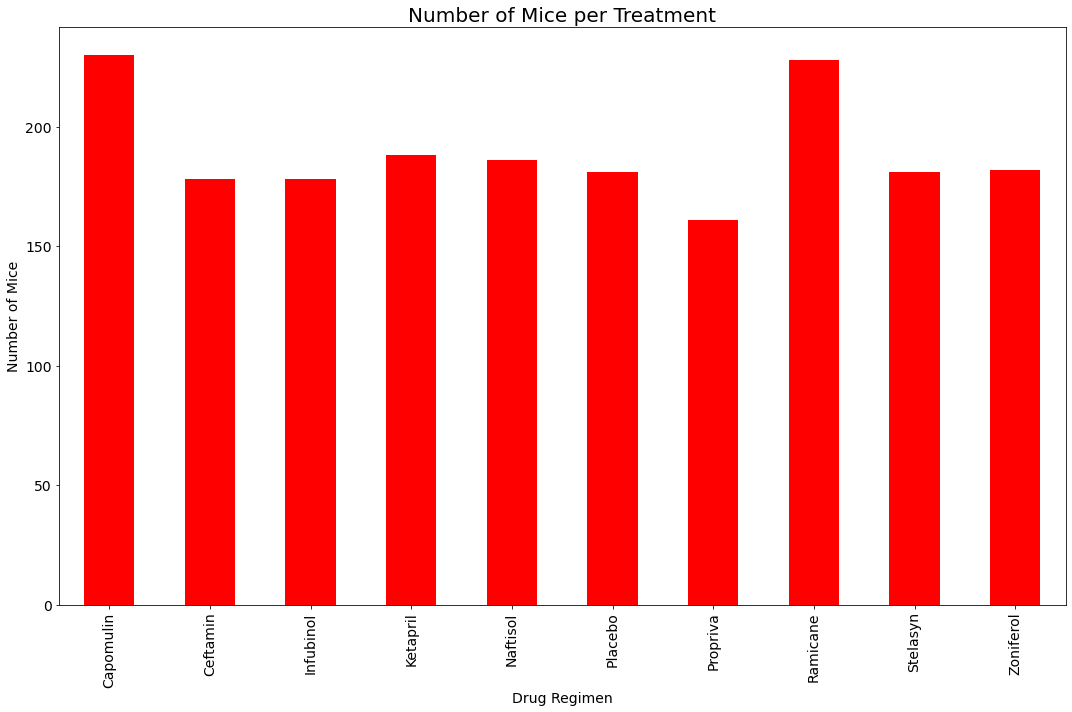

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     161
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Mouse ID, dtype: int64

In [231]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pandas

bar_data = mouse_data_results.groupby(["Drug Regimen"]).count()["Mouse ID"] 


plot_pandas = bar_data.plot.bar(figsize=(15,10), color='red',fontsize = 14)
plt.xlabel("Drug Regimen",fontsize = 14)
plt.ylabel("Number of Mice",fontsize = 14)
plt.title("Number of Mice per Treatment",fontsize = 20)

plt.tight_layout()
plt.show()

bar_data

Text(0, 0.5, 'Number of Mice')

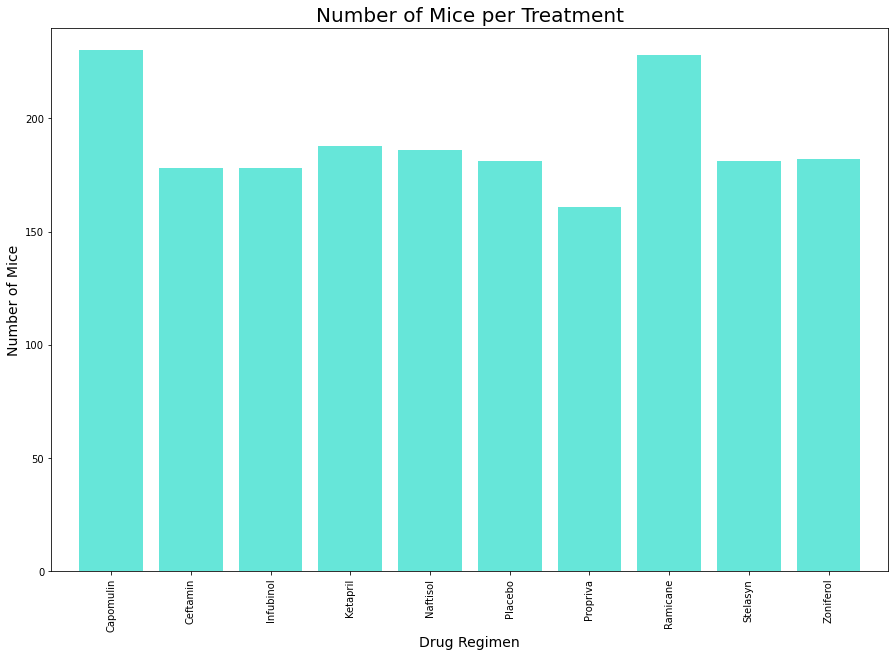

In [238]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pyplot
bar_data_2 =(mouse_data_results.groupby(["Drug Regimen"])["Mouse ID"].count()).tolist()
bar_data_2

x_axis = np.arange(len(bar_data))
fig1, ax1 = plt.subplots(figsize=(15, 10))
plt.bar(x_axis, bar_data_2, color='turquoise', alpha=0.8, align='center')

tick_locations = [value for value in x_axis]

plt.xticks(tick_locations, ['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol'],  rotation='vertical')

plt.xlim(-0.75, len(x_axis)-0.25)

plt.ylim(0, max(bar_data_2)+10)

plt.title("Number of Mice per Treatment",fontsize = 20)
plt.xlabel("Drug Regimen",fontsize = 14)
plt.ylabel("Number of Mice",fontsize = 14)

## Pie Plots

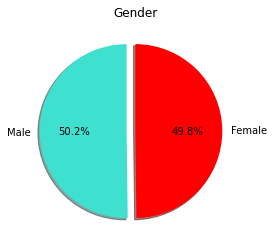

In [168]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
mouse_gender = clean_dataframe["Sex"].value_counts()
labels=mouse_gender.values

sizes=mouse_gender.values
colors=['turquoise', 'red']
#New Mexico Colors

explode = [0.1,0]

mouse_gender.plot(kind="pie", explode = explode, colors = colors, autopct = "%1.1f%%", shadow = True, startangle = 90)

plt.title("Gender")
plt.ylabel ("")
plt.show() 

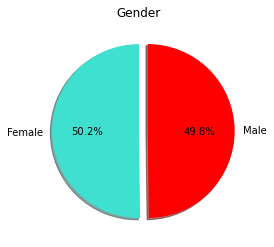

In [169]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = 'Female', 'Male'
colors=['turquoise', 'red']
explode = (0, 0.1,)

fig1, ax1 = plt.subplots()
plt.pie(sizes, colors = colors, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)

plt.title("Gender")

plt.show()

## Quartiles, Outliers and Boxplots

In [170]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 
final_four = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
final_four = mouse_data_results[mouse_data_results['Drug Regimen'].isin(final_four)]
final_four.head(5)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [171]:
#Calculate the IQR and quantitatively determine if there are any potential outliers.
capomulin = mouse_data_results.loc[mouse_data_results['Drug Regimen'] == 'Capomulin']['Tumor Volume (mm3)']
ramicane = mouse_data_results.loc[mouse_data_results['Drug Regimen'] == 'Ramicane']['Tumor Volume (mm3)']
infubinol = mouse_data_results.loc[mouse_data_results['Drug Regimen'] == 'Infubinol']['Tumor Volume (mm3)']
ceftamin = mouse_data_results.loc[mouse_data_results['Drug Regimen'] == 'Ceftamin']['Tumor Volume (mm3)']

In [172]:
#Capomulin
quartile_cap = capomulin.quantile([.25,.5,.75])
lower_cap = quartile_cap[.25]
upper_cap = quartile_cap[.75]
iqr = upper_cap-lower_cap

lower_ocap = lower_cap - (1.5*iqr)
upper_ocap = upper_cap + (1.5*iqr)

print(f"Capomulin potential outliers could be be values {lower_ocap} and above {upper_ocap} could be outliers.")

Capomulin potential outliers could be be values 26.714832162499995 and above 55.9711007025 could be outliers.


In [173]:
#Infubinol
quartile_in = infubinol.quantile([.25,.5,.75])
lower_in = quartile_in[.25]
upper_in = quartile_in[.75]
iqr = upper_in-lower_in

lower_oin = lower_in - (1.5*iqr)
upper_oin = upper_in + (1.5*iqr)

print(f"Infubinol potential outliers could be be values {lower_oin} and above {upper_oin} could be outliers.")

Infubinol potential outliers could be be values 32.309217298749985 and above 72.31757996875001 could be outliers.


In [174]:
#Ramicane
quartile_ram = ramicane.quantile([.25,.5,.75])
lower_ram = quartile_ram[.25]
upper_ram = quartile_ram[.75]
iqr = upper_ram-lower_ram

lower_oram = lower_ram - (1.5*iqr)
upper_oram = upper_ram + (1.5*iqr)

print(f"Ramicane potential outliers could be be values {lower_oram} and above {upper_oram} could be outliers.")

Ramicane potential outliers could be be values 24.18658646249998 and above 57.48804812250001 could be outliers.


In [175]:
#Ceftmain
quartile_cef = ceftamin.quantile([.25,.5,.75])
lower_cef = quartile_cef[.25]
upper_cef = quartile_cef[.75]
iqr = upper_cef-lower_cef

lower_ocef = lower_cef - (1.5*iqr)
upper_ocef = upper_cef + (1.5*iqr)

print(f"Ceftmain potential outliers coul be be values {lower_ocef} and above {upper_ocef} could be outliers.")

Ceftmain potential outliers coul be be values 32.818911426250004 and above 71.19095325625 could be outliers.


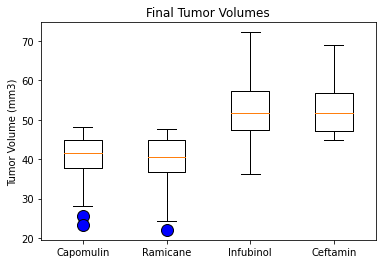

In [176]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
box_plot = dict(markerfacecolor = 'blue', markersize = 12)

plt.boxplot ([capomulin, ramicane, infubinol, ceftamin], labels = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"], flierprops = box_plot)

plt.title ("Final Tumor Volumes")
plt.ylabel ("Tumor Volume (mm3)")
plt.show()

## Line and Scatter Plots

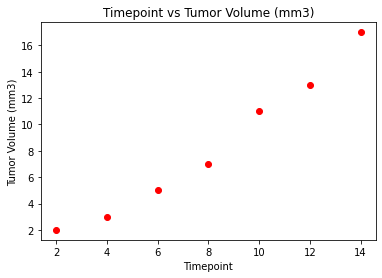

In [239]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
capomulin_table = mouse_data_results.loc[mouse_data_results["Drug Regimen"]== "Capomulin"]
mouse = mouse_data_results.loc[mouse_data_results["Mouse ID"] == "1509"]


x = np.linspace(0, 5, 40)

plt.plot(mouse["Timepoint"], mouse["Tumor Volume (mm3)"])
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")

plt.scatter(range(2,15,2), [2, 3, 5, 7, 11, 13, 17,], color="red")

plt.title ("Timepoint vs Tumor Volume (mm3)")
plt.show()

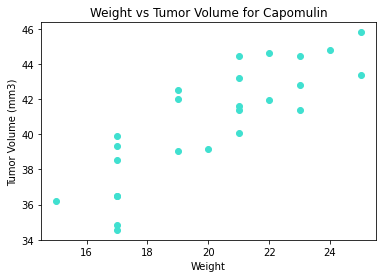

In [240]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
capomulin_weight = mouse_data_results.loc[mouse_data_results['Drug Regimen'] == 'Capomulin']

cap_avg = capomulin_weight.groupby(["Mouse ID"]).mean()

plt.scatter(cap_avg["Weight (g)"], cap_avg["Tumor Volume (mm3)"], color="turquoise")
plt.xlabel("Weight")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Weight vs Tumor Volume for Capomulin")
plt.show()


## Correlation and Regression

In [200]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
corr=round(st.pearsonr(cap_avg['Weight (g)'],cap_avg['Tumor Volume (mm3)'])[0],2)
print(f"The correlation between mouse weight and average tumor volume is {corr}")

The correlation between mouse weight and average tumor volume is 0.84


In [203]:
model=st.linregress(cap_avg['Weight (g)'],cap_avg['Tumor Volume (mm3)'])
model

LinregressResult(slope=0.9544396890241045, intercept=21.552160532685015, rvalue=0.8419363424694718, pvalue=1.3225722434712642e-07, stderr=0.1275435903320134)

In [204]:
mslope = 0.9544396890241045
bintercept = 21.552160532685015

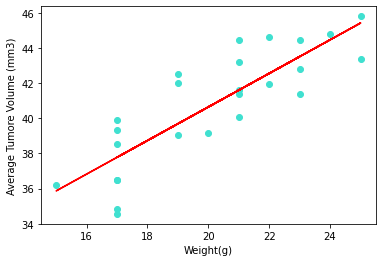

In [242]:
y_values = cap_avg['Weight (g)']*mslope+bintercept
plt.scatter(cap_avg['Weight (g)'],cap_avg['Tumor Volume (mm3)'], color="turquoise")
plt.plot(cap_avg['Weight (g)'],y_values, color="red")
plt.xlabel('Weight(g)')
plt.ylabel('Average Tumore Volume (mm3)')

plt.savefig('linearregression')
plt.show()